In [1]:
# Imports

import pandas as pd
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import scipy.stats

Q1. Outputs for dataset without pathway augmentation

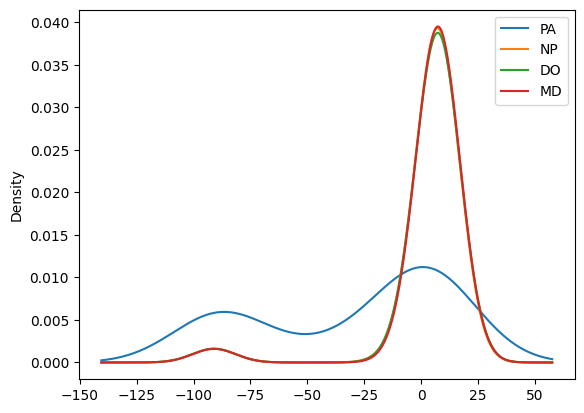

In [2]:
# Reward Density of Data

def reward_density_q1():
    files = sorted(glob.glob(f'offline_data/Agent Generated/*.csv'), key = lambda x: int(x.split('_')[-1].split('.')[0]))
    dfs = [pd.read_csv(paths, index_col= None) for paths in files]
    experts = ['PA', 'NP', 'DO', 'MD']
    for df,exp in zip(dfs,experts):
        reward_col = df.groupby('episode_id').apply(lambda x: x['reward'].sum()).rename(exp, inplace= True)
        reward_col.plot.density(bw_method= 0.5, legend = True, figsize = (6.4, 4.8))

reward_density_q1()


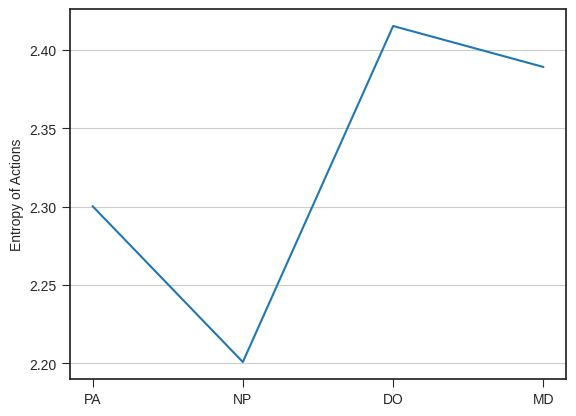

In [3]:
# Entropy of actions

def calculate_entropy_actions(data):
    probs = data['action'].value_counts(normalize= True).to_list()

    entropy = 0
    for i in probs:
        x = i*np.log2(i)
        entropy += x
    return entropy*(-1)


def plot_entropy_q1():

    files = sorted(glob.glob(f'offline_data/Agent Generated/*.csv'), key = lambda x: int(x.split("_")[-1].split(".")[0]))
    dfs = [pd.read_csv(paths, index_col= None) for paths in files]
    experts = ['PA', 'NP', 'DO', 'MD']
    entropy = []
    for df in dfs:
        entropy.append(calculate_entropy_actions(df))

    mpl.rcParams['font.family'] = 'Liberation Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.linewidth'] = 2
    mpl.style.use('seaborn-ticks')

    plt.plot(experts, entropy)
    plt.grid(axis= 'y')
    plt.ylabel("Entropy of Actions")
    plt.show()


plot_entropy_q1()

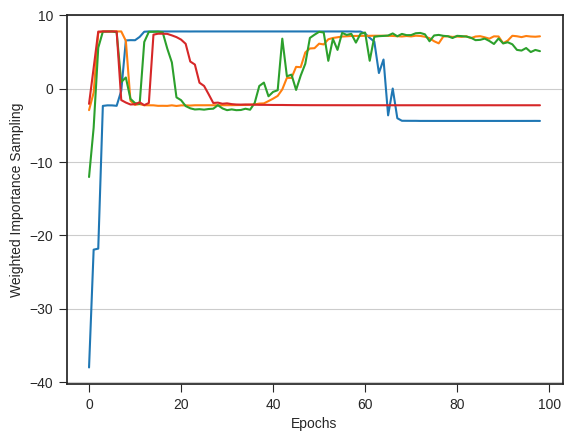

In [4]:
# Weighted Importance Sampling

def wis_q1():
    # Style Setting
    font_names = [f.name for f in fm.fontManager.ttflist]
    mpl.rcParams['font.family'] = 'Liberation Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.linewidth'] = 2
    mpl.style.use('seaborn-ticks')

    files = sorted(glob.glob(f'offline_result/RQ1/**/[worker]*', recursive= True),
                    key = lambda x: int(x.split("/")[2]))
    dfs = [pd.read_csv(fp, skipinitialspace=True, usecols=["Weighted Importance Sampling"]) for fp in files]

    for df,ind in zip(dfs,range(len(dfs))):
        df.rename({"Weighted Importance Sampling": f"Weighted Importance Sampling {ind}"}, axis=1, inplace= True)
    df = pd.concat(dfs, axis=1)
    df.dropna(axis = 0, inplace =True)
    df.reset_index(drop=True, inplace = True)





    # Plotting
    x = [i for i in df.index]
    y = df["Weighted Importance Sampling 0"]
    y1 = df["Weighted Importance Sampling 1"]
    y2 = df["Weighted Importance Sampling 2"]
    y3 = df["Weighted Importance Sampling 3"]
    plt.plot(x, y )
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.plot(x, y3)

    plt.xlabel('Epochs')
    plt.ylabel('Weighted Importance Sampling')
    plt.grid(axis='y')

    # plt.fill_between(x, y+error, y-error, facecolor = 'blue', alpha = .5)
    # plt.title("Policy Evaluation during Offline Training of MD Generated Datasets", y=-0.30)
    # plt.savefig(f'./offline_result/15_1/15_1.png', bbox_inches = 'tight')


wis_q1()

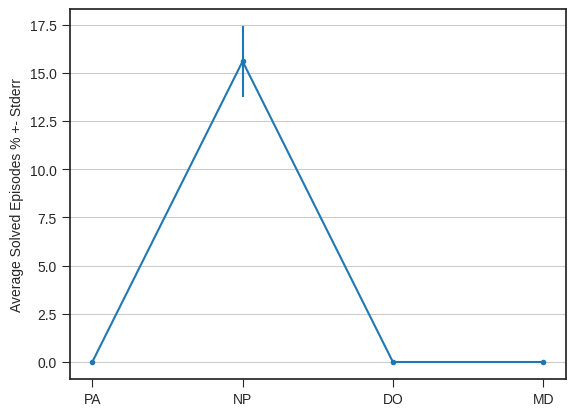

In [5]:
# Number of solved episodes


def solved_episode_q1():
    solved = []
    error = []
    filenames = ['5', '10', '15', '20']
    for i in filenames:
        df = pd.read_csv(f'offline_result/RQ1/{i}/test_reward_{i}.csv', index_col=None)
        cols = [i for i in range(3,len(df.columns),4)]
        rewards = df.iloc[:,cols]

        cum_rewards = rewards.loc[99, :].values.flatten().tolist()
        mean, se = np.mean(cum_rewards), scipy.stats.sem(cum_rewards)

        col = [i for i in range(2,len(df.columns), 4)]
        sum_reward = df.iloc[:,col]


        s = []
        for i in sum_reward:
            s.append(len(sum_reward[i].loc[sum_reward[i]>0]))

        solved_episodes = np.mean(s)
        solved.append(solved_episodes)

        stderror = scipy.stats.sem(s)
        error.append(stderror)

    return solved, error


solved, error = solved_episode_q1()


mpl.rcParams['font.family'] = 'Liberation Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 2
mpl.style.use('seaborn-ticks')

xlabel = ['PA', 'NP', 'DO', 'MD']
plt.errorbar(xlabel, solved, error, linestyle = '-', marker = '.')
plt.ylabel('Average Solved Episodes % +- Stderr')
plt.grid(axis = 'y')




Q2. Outputs MD Generated Dataset with Pathway Augmentation

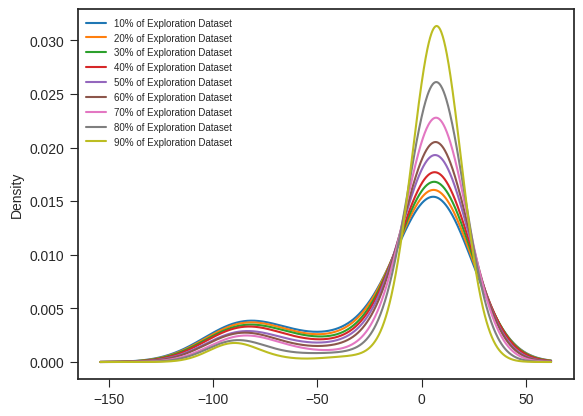

In [6]:
# Reward Density


def reward_density_q2(timesteps):
    files = sorted(glob.glob(f'offline_data/Augmented Data {timesteps}/[buffer]*.csv'), reverse= True)
    new_files = [' '.join(el.split()[1:-1]) for el in files]
    y = [x for x in files if x not in new_files]

    dfs = [pd.read_csv(i, index_col= None) for i in y]

    i = 10
    for df in dfs:
        reward_col = df.groupby('episode_id').apply(lambda x: x['reward'].sum()).rename(str(i)+'% of Exploration Dataset', inplace= True)
        i += 10
        ax = reward_col.plot.density(bw_method= 0.5, legend = True, figsize = (6.4, 4.8))
        ax.legend(loc = 'upper left', fontsize = 7)


    plt.show()

reward_density_q2(20)

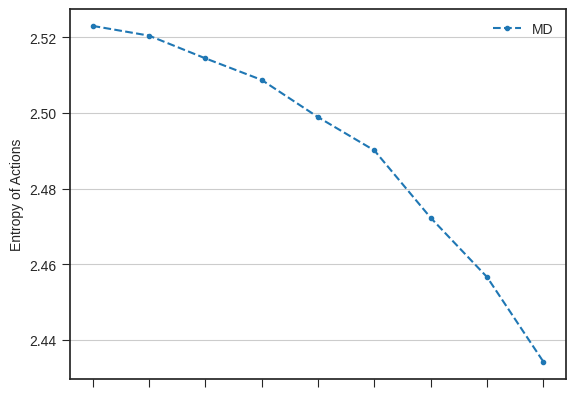

In [7]:
# Entropy of Actions


def entropy(timesteps):
    files = sorted(glob.glob(f'offline_data/Augmented Data {timesteps}/[buffer]*.csv'), reverse= True)
    dfs = [pd.read_csv(i, index_col= None) for i in files]
    ent = []
    for i in dfs:
        ent.append(calculate_entropy_actions(i))
    
    return ent


def plot_entropy_q2():
    entropy_20 = entropy(20)
    # filenames = ['90% of\n Exploration \n Dataset', 
    #             '80% of\n Exploration \n Dataset', 
    #             '70% of\n Exploration \n Dataset', 
    #             '60% of\n Exploration \n Dataset', 
    #             '50% of\n Exploration \n Dataset', 
    #             '40% of\n Exploration \n Dataset', 
    #             '30% of\n Exploration \n Dataset', 
    #             '20% of\n Exploration \n Dataset', 
    #             '10% of\n Exploration \n Dataset']
    names = [i for i in range(10,100, 10)]
    plt.plot(names, entropy_20, linestyle = '--', marker = '.', label = 'MD')
    plt.ylabel('Entropy of Actions')
    plt.tick_params(labelbottom = False)
    plt.grid(axis = 'y')
    plt.legend(loc = 'upper right')
    # plt.title('Entropy of Actions in Clinical Pathway Generated by MD', y = -0.30)
    #plt.savefig('./Figures/20_q2.png')

plot_entropy_q2()

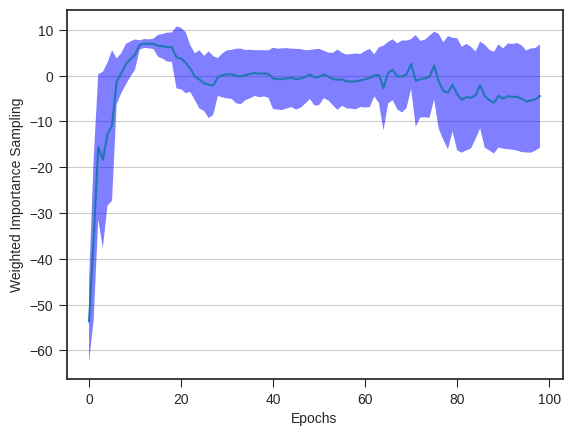

In [8]:
# Weighted Importance Sampling


def wis_q2():
    files = sorted(glob.glob(f'offline_result/RQ2/[buffer]*/[worker]*'))
    dfs = [pd.read_csv(fp, skipinitialspace=True, usecols=["Weighted Importance Sampling"]) for fp in files]
    df = pd.concat(dfs, axis=1)
    df.dropna(axis = 0, inplace =True)
    df.reset_index(drop=True, inplace = True)


    # Style Setting
    font_names = [f.name for f in fm.fontManager.ttflist]
    mpl.rcParams['font.family'] = 'Liberation Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.linewidth'] = 2
    mpl.style.use('seaborn-ticks')


    # Plotting
    x = [i for i in df.index]
    y = df.mean(axis = 1)
    #y = value.transform(lambda x: np.log2(x))
    error = df.std(axis = 1)
    plt.plot(x,y)
    plt.xlabel('Epochs')
    plt.ylabel('Weighted Importance Sampling')
    plt.grid(axis='y')
    plt.fill_between(x, y+error, y-error, facecolor = 'blue', alpha = .5)
    # plt.savefig('./Figures/WIS_MD_1.png')

wis_q2()

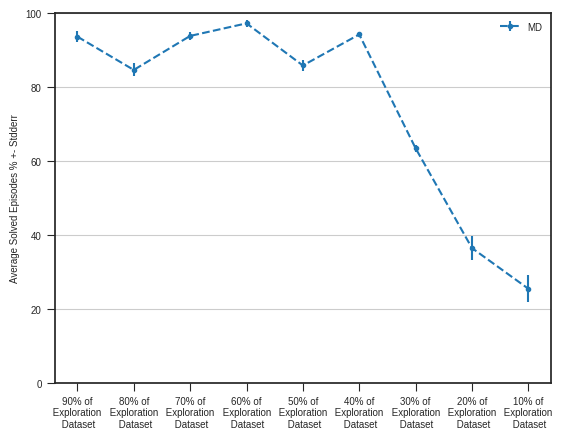

In [9]:
# Solved Episodes Q2

filenames = ['buffer_90', 'buffer_80', 'buffer_70', 'buffer_60', 'buffer_50', 'buffer_40', 'buffer_30', 'buffer_20', 'buffer_10']
def performance(timesteps):
    solved = []
    error = []

    for i in filenames:
        df = pd.read_csv(f'offline_result/RQ3/{timesteps}/{i}/test_reward_{i.split("_")[-1]}.csv', index_col=None)
        cols = [i for i in range(3,len(df.columns),4)]
        rewards = df.iloc[:,cols]

        cum_rewards = rewards.loc[99, :].values.flatten().tolist()
        mean, se = np.mean(cum_rewards), scipy.stats.sem(cum_rewards)

        col = [i for i in range(2,len(df.columns), 4)]
        sum_reward = df.iloc[:,col]


        s = []
        for i in sum_reward:
            s.append(len(sum_reward[i].loc[sum_reward[i]>0]))

        solved_episodes = np.mean(s)
        solved.append(solved_episodes)

        stderror = scipy.stats.sem(s)
        error.append(stderror)

    return solved , error


solved_20, error_20 = performance(20)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm


mpl.rcParams['font.family'] = 'Liberation Mono'
plt.rcParams['font.size'] = 7
plt.rcParams['axes.linewidth'] = 2
mpl.style.use('seaborn-ticks')

xlabels = ['90% of\n Exploration \n Dataset', 
            '80% of\n Exploration \n Dataset', 
            '70% of\n Exploration \n Dataset', 
            '60% of\n Exploration \n Dataset', 
            '50% of\n Exploration \n Dataset', 
            '40% of\n Exploration \n Dataset', 
            '30% of\n Exploration \n Dataset', 
            '20% of\n Exploration \n Dataset', 
            '10% of\n Exploration \n Dataset']
plt.errorbar(xlabels, solved_20, error_20, linestyle = '--', marker = '.', label = 'MD')
plt.ylabel('Average Solved Episodes % +- Stdderr')
#plt.xlabel('Lower Experience to Higher Experience Dataset Ratio')
plt.ylim(0,100)
plt.grid(axis = 'y')
plt.legend(loc = 'upper right')

Q3. Outputs of all Agents with Pathway Augmentation

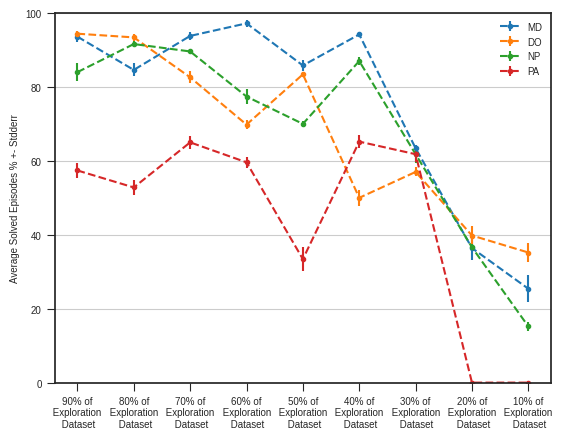

In [10]:
# solved episodes

filenames = ['buffer_90', 'buffer_80', 'buffer_70', 'buffer_60', 'buffer_50', 'buffer_40', 'buffer_30', 'buffer_20', 'buffer_10']
def performance(timesteps):
    solved = []
    error = []

    for i in filenames:
        df = pd.read_csv(f'offline_result/RQ3/{timesteps}/{i}/test_reward_{i.split("_")[-1]}.csv', index_col=None)
        cols = [i for i in range(3,len(df.columns),4)]
        rewards = df.iloc[:,cols]

        cum_rewards = rewards.loc[99, :].values.flatten().tolist()
        mean, se = np.mean(cum_rewards), scipy.stats.sem(cum_rewards)

        col = [i for i in range(2,len(df.columns), 4)]
        sum_reward = df.iloc[:,col]


        s = []
        for i in sum_reward:
            s.append(len(sum_reward[i].loc[sum_reward[i]>0]))

        solved_episodes = np.mean(s)
        solved.append(solved_episodes)

        stderror = scipy.stats.sem(s)
        error.append(stderror)

    return solved , error


solved_20, error_20 = performance(20)
solved_15, error_15 = performance(15)
solved_10, error_10 = performance(10)
solved_5, error_5 = performance(5)



mpl.rcParams['font.family'] = 'Liberation Mono'
plt.rcParams['font.size'] = 7
plt.rcParams['axes.linewidth'] = 2
mpl.style.use('seaborn-ticks')

xlabels = ['90% of\n Exploration \n Dataset', 
            '80% of\n Exploration \n Dataset', 
            '70% of\n Exploration \n Dataset', 
            '60% of\n Exploration \n Dataset', 
            '50% of\n Exploration \n Dataset', 
            '40% of\n Exploration \n Dataset', 
            '30% of\n Exploration \n Dataset', 
            '20% of\n Exploration \n Dataset', 
            '10% of\n Exploration \n Dataset']
plt.errorbar(xlabels, solved_20, error_20, linestyle = '--', marker = '.', label = 'MD')
plt.errorbar(xlabels, solved_15, error_15, linestyle = '--', marker = '.', label = 'DO')
plt.errorbar(xlabels, solved_10, error_10, linestyle = '--', marker = '.', label = 'NP')
plt.errorbar(xlabels, solved_5, error_5, linestyle = '--', marker = '.', label = 'PA')
plt.ylabel('Average Solved Episodes % +- Stdderr')
#plt.xlabel('Lower Experience to Higher Experience Dataset Ratio')
plt.ylim(0,100)
plt.grid(axis = 'y')
plt.legend(loc = 'upper right')